In [ ]:
from re import X
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

In [ ]:
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vSoleTscHZCrVRMTbAc31GFXwMG6LF6oKEa4G_Ff45i-InKpDpzSfPSn43PAMeINbC3gEX0V7POhA7V/pub?output=csv'
X_ = pd.read_csv(url)
X_ = X_.values
k = 4

In [ ]:
# 2. Normalizar los datos
def standardize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    return (X - mean) / std

# 3. Aplicar PCA
def pca(X, n_components=2):
    cov = np.cov(X.T)
    eigenvalues, eigenvectors = np.linalg.eig(cov)
    idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    # Seleccionar las primeras n componentes principales
    eigenvectors = eigenvectors[:, :n_components]
    return np.dot(X, eigenvectors)

In [ ]:
X_standardized = standardize(X_)
X_pca = pca(X_standardized)

pca = PCA(n_components=3)  # Cambia a 3 componentes principales
X_pca = pca.fit_transform(X_)

In [ ]:
# 3. Aplicar PCA
def pca(X, n_components=2):
    cov = np.cov(X.T)
    eigenvalues, eigenvectors = np.linalg.eig(cov)
    idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    # Seleccionar las primeras n componentes principales
    eigenvectors = eigenvectors[:, :n_components]
    return np.dot(X, eigenvectors)

# 4. Inicializar los centroides
def initialize_centroids(X, k):
    return X[np.random.choice(X.shape[0], k, replace=False)]

# 5. Calcular la distancia de Mahalanobis
def distancia_mahalanobis(x, c, inv_cov):
    delta = x - c
    return np.sqrt(np.dot(np.dot(delta, inv_cov), delta.T))

# 6. Implementar el algoritmo K-means con distancia de Mahalanobis
def kmeans_mahalanobis(X, k, max_iter=170000, tol=1e-6):
    # Calcular la covarianza e inversa
    cov = np.cov(X.T)
    inv_cov = np.linalg.inv(cov)

    centroids = initialize_centroids(X, k)

    for _ in range(max_iter):
        # Asignar cada punto al cluster más cercano
        distances = np.array([[distancia_mahalanobis(x, c, inv_cov) for c in centroids] for x in X])
        clusters = np.argmin(distances, axis=1)

        # Actualizar centroides
        new_centroids = np.array([X[clusters == i].mean(axis=0) for i in range(k)])

        # Verificar convergencia
        if np.allclose(centroids, new_centroids, atol=tol):
            break

        centroids = new_centroids

    return clusters, centroids

In [ ]:
# 7. Visualizar los resultados
def graficar_clusters_PCA2D(clusters, metodo, centroids, X_pca):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1],
                    hue=clusters, palette='Set1',
                    alpha=0.8, s=100)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=200, marker='X', label='Centroides')
    plt.title(f'Visualización 2D de la Clusterización ({metodo})', fontsize=16)
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.grid(True)
    plt.grid(linestyle='-', alpha=0.5)
    plt.legend(title='Cluster')
    plt.tight_layout()
    plt.show()

# Ejecutar el algoritmo K-means
clusters, centroids_mahalanobis = kmeans_mahalanobis(X_pca, k)

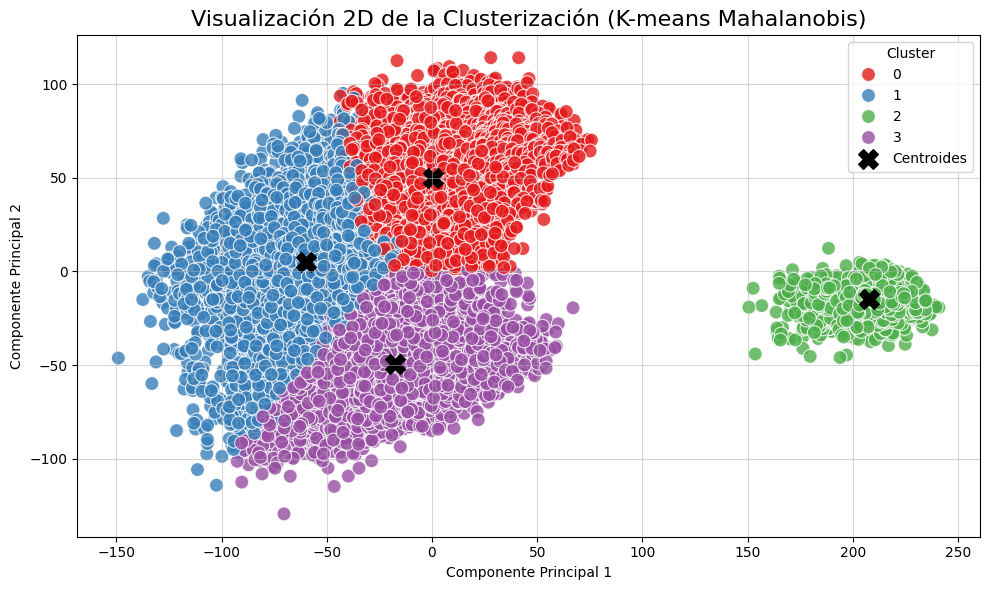

<Figure size 640x480 with 0 Axes>

In [ ]:
# Llamar a la función de visualización
graficar_clusters_PCA2D(clusters, 'K-means Mahalanobis', centroids_mahalanobis, X_pca)

# Guardar el gráfico como imagen
plt.savefig('cluster_kmeans_mahalanobis.png', dpi=300, bbox_inches='tight')

In [ ]:
def graficar_clusters_PCA3D(clusters, metodo, centroids, X_pca):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Graficar los puntos de los clusters
    scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2],
                         c=clusters, cmap='Set1', s=100, edgecolor='white',alpha=0.8)

    # Graficar los centroides
    ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2],
               c='black', s=200, marker='X', label='Centroides')

    ax.set_title(f'Visualización 3D de la Clusterización ({metodo})', fontsize=16)
    ax.set_xlabel('Componente Principal 1')
    ax.set_ylabel('Componente Principal 2')
    ax.set_zlabel('Componente Principal 3')

    # Añadir leyenda
    legend1 = ax.legend(*scatter.legend_elements(), title="Cluster")
    ax.add_artist(legend1)

    # Mostrar la gráfica
    plt.tight_layout()
    plt.show()

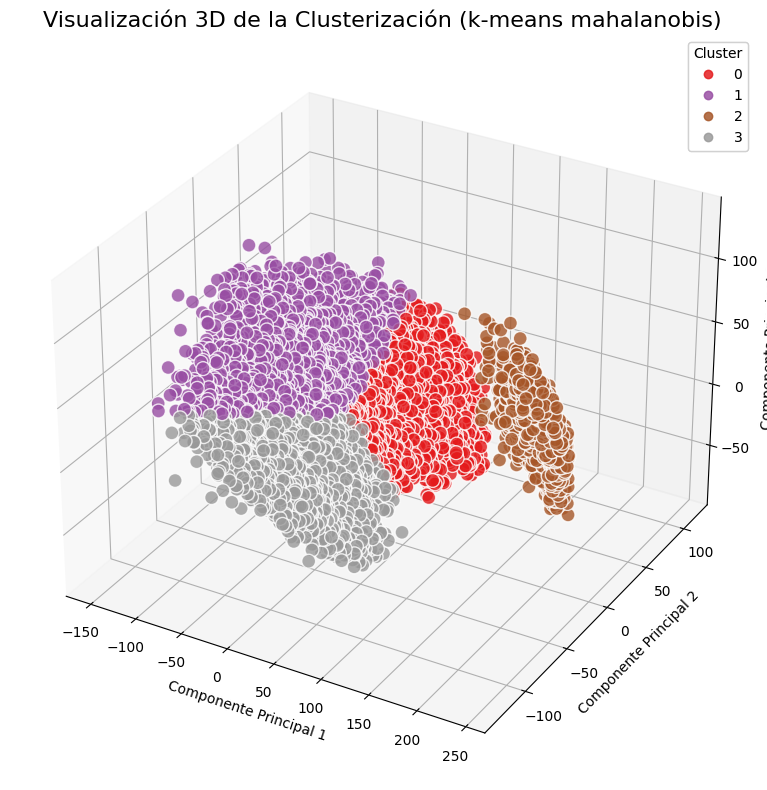

In [ ]:
kmeans_3D = graficar_clusters_PCA3D(clusters, 'k-means mahalanobis', centroids_mahalanobis, X_pca)